In [1]:
# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한(표시 용)
X_max = 30 # X의 상한(표시 용)
X_n = 16 # X의 상한(표시 용)

# 램덤한 X의 원소 값(5 ~ 30)으로 1xX_n 크기의 행렬 X 
X = 5 + 25*np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)

In [2]:
# --- 리스트 5-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 로드 ----------------------------  ==> 파일에 저장하고 데이터 불러오는 예제 (***앞으로는 많이 쓰니까 눈여겨보기***)
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [3]:
# --- 리스트 5-2-(2)
# 가우스 함수 ---------------------------------
def gauss(x, mu, s):
    # return np.exp(  ), 평균:mu, 표준편차: s 인 가우스안 함수 구현, 식 5-64 참조 (수업시간에 구현)
     return np.exp(-(x-mu)**2 / (2 * s**2))

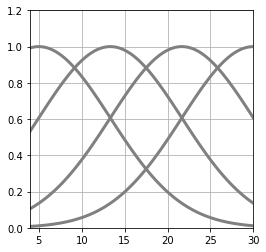

In [4]:
# 리스트 5-2-(3)
# 메인 ------------------------------------
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M) #1. 평균 mu 계산 ==> 5살부터 30살까지의 범위를 M등분(M=4이므로 4등분해서 mu값으로 취하겠다 / mu: 5, 5+7.5, ...)
s = mu[1] - mu[0]          #2. 표준편차 계산
xb = np.linspace(X_min, X_max, 100) # 출력범위 지정
for j in range(M):
    # 가우시안 함수의 결과 벡터 y 계산
    y=gauss(xb, mu[j], s)  # j가 M에 따라서 바뀜(0,1,2,3까지) / mu[0], mu[1], mu[2], mu[3] (위에서 mu 총 4등분 한 것)
    plt.plot(xb, y, color='gray', linewidth=3) #y 출력벡터 그리기
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

In [5]:
# 리스트 5-2-(4)
# 선형 기저 함수 모델 ---------------- cf. yn = w0파이0(x) + w1파이1(x) + w2파이2(x) + w3파이3(x) + w4
def gauss_func(w, x):
    m = len(w) - 1   # yn에서 맨 마지막 항은 파이함수랑 관련이 없는 항이므로(w4)
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]  # mu와 mu 사이의 간격(s : 폭)
    y = np.zeros_like(x) # x와 같은 크기로 요소가 모두 0으로 구성된 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)  # *** y : 16x1 짜리 벡터(행렬). 따라서 w값만 달리해서 벡터단위로 계산하는 것!! ***
    y = y + w[m]
    return y

In [6]:
# 리스트 5-2-(5)
# 선형 기저 함수 모델 MSE ----------------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    # mse  계산
    mse=np.mean((y-t)**2)
    return mse

In [7]:
# 리스트 5-2-(6)
# 선형 기저 함수 모델 정확한 솔루션 -----------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))  # 파이라는 행렬을 모두 0으로 초기화 (16 x (m+1)) / m+1 : w벡터의 원소 수 +1...
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)  # 콜론 : 행에 해당하는 것 전부!(16개의 행 전부) / 따라서 각 열에 대해서 계산하는 것???행아닌가??
    # Moore-Penrose Pseudo-inverse Matrix으로 가중치 벡터 w 계산
    psi_T = np.transpose(psi)
    
    
    b = np.linalg.inv(psi_T.dot(psi))
    c=b.dot(psi_T)
    w=c.dot(t)
    return w

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


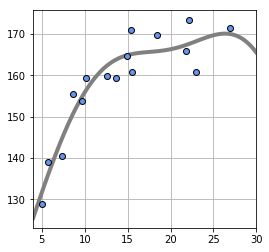

In [8]:
# 리스트 5-2-(7)
# 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 

    
# 메인 ----------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M) # 가중치 벡터 W 계산
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

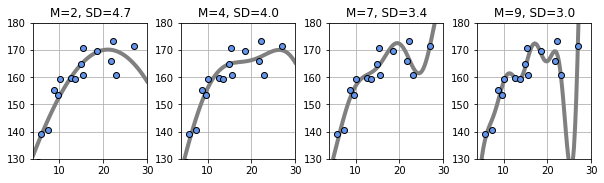

In [9]:
# 리스트 5-2-(8)  ==> 그래프의 왜곡 보여주는 예제(오버피팅 - 가우시안 함수 많이 쓸 수록 큰? mse 발생...==> 따라서 몇개 써야하는지 m값 결정 중요!)
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()
# 그래프의 모잉이, 데이터가 주어진 부분에서만 충실하게 표시되고, 없는 부분에 대해서는 오버피팅...왜곡...(마지막 그래프 처럼)

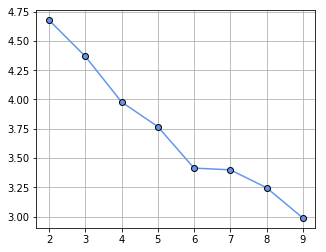

In [10]:
# 리스트 5-2-(9)  ==> mse값 점점 떨어지는디....????? 위에서는 점점 큰 mse라고 했는데?!?!
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()


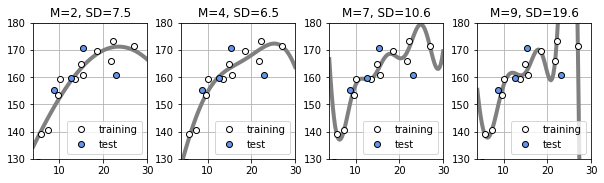

In [11]:
# 리스트 5-2-(10)  ==> 홀드 아웃 트레이닝 방법. *** 머신 러닝에서 전반적으로 계속 쓰는 알고리즘 이므로 잘 알아두기!! *** (코드 다시 확인)
# 훈련 데이터와 테스트 데이터 ------------------
#Test Data (X_test, T_test) 구성, Training Data 구성(X_train, T_train )

X_test = X[:int(X_n / 4 +1)] # X_n : 입력 벡터의 수 / 입력벡터들을 4등분해서 첫번째 그룹을 갖다가 훈련데이터집합으로 쓰겠다(test 집합)
T_test = T[:int(X_n / 4 +1)]
X_train = X[int(X_n / 4 +1):] # 4등분하고나서 나머지 애들.
T_train = T[int(X_n / 4 +1):]
# 메인 ------------------------------------
plt.figure(figsize=(10, 2.5))



plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)  # 검증하는 부분!!
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))  # 결과값 보여주는 부분 
plt.show()  

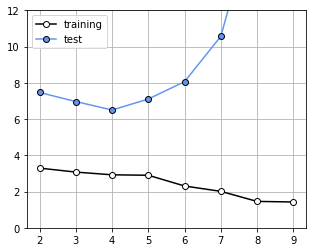

In [12]:
# 리스트 5-2-(11)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M)) 
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
# 훈련데이터와 테스트데이터에 관한 평균제곱 오차의 root를 계산  
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white', markeredgecolor='black',
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black',
         label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()


In [13]:
# 리스트 5-2-(12)
# K 분할 교차 검증 -----------------------------
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        # K 분할 교차 검증의 트레닝 데이터와 테스트 데이터 구성
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

In [14]:
# 리스트 5-2-(13)
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [15]:
# 리스트 5-2-(14)
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782012,  18.30921743,  47.52459642]))

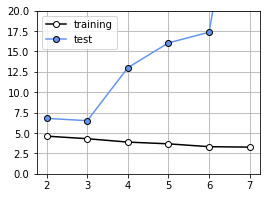

In [16]:
# 리스트 5-2-(15)
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

SD=4.37 cm


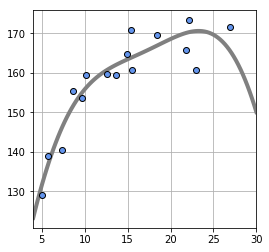

In [17]:
# 리스트 5-2-(16)
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

In [18]:
# 리스트 5-2-(17)
# 모델 A -----------------------------------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y 


# 모델 A 표시 -------------------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 모델 A의 MSE ------------------------------
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

In [19]:
# 리스트 5-2-(18)
from scipy.optimize import minimize 


# 모델 A의 매개 변수 최적화 -----------------
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


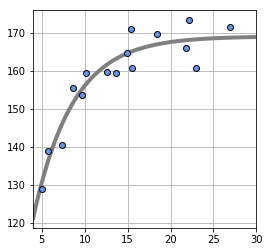

In [20]:
# 리스트 5-2-(19)
# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


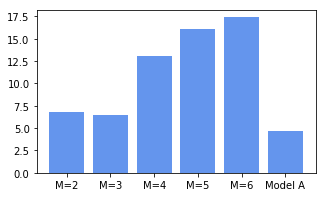

In [21]:
# 리스트 5-2-(20)
# 교차 검증 model_A ---------------------------
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test


# 메인 ------------------------------------
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()